In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve,make_timing_curve,make_timing_curve_fixed, plot_result,make_timing_curve_from_param
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import SGDClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

**Load Cleaned Adult Data**

In [ ]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.2,random_state=0)
print(f"adult_df: {adult_df.shape}")
print(f"X_adult_train: {X_adult_train.shape}")
print(f"X_adult_test: {X_adult_test.shape}")
print(f"y_adult_train: {y_adult_train.shape}")
print(f"y_adult_test: {y_adult_test.shape}")
print(f"y_adult_train pos: {(y_adult_train > 0).sum() / len(y_adult_train)}")
print(f"y_adult_train neg: {(y_adult_train == 0).sum() / len(y_adult_train)}")
pipeAdult = Pipeline([('Scale',StandardScaler())])
X_trans_adult_train = pipeAdult.fit_transform(X_adult_train, y_adult_train)
print(f"X_trans_adult_train: {X_trans_adult_train.shape}")

**Load Spam**

In [ ]:
spam_df = pd.read_csv('spambase.csv', header=0)
spam_x = spam_df.drop('class', axis=1).copy().values
spam_y = spam_df['class'].copy().values
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(spam_x, spam_y, test_size=0.2,random_state=0)
print(f"spam_df: {spam_df.shape}")
print(f"X_spam_train: {X_spam_train.shape}")
print(f"X_spam_test: {X_spam_test.shape}")
print(f"y_spam_train: {y_spam_train.shape}")
print(f"y_spam_test: {y_spam_test.shape}")
print(f"y_spam_train pos: {(y_spam_train > 0).sum() / len(y_spam_train)}")
print(f"y_spam_train neg: {(y_spam_train == 0).sum() / len(y_spam_train)}")
pipeSpam = Pipeline([('Scale',StandardScaler())])
X_trans_spam_train = pipeSpam.fit_transform(X_spam_train, y_spam_train)
print(f"X_tran_spam_train: {X_trans_spam_train.shape}")

In [62]:
params = {'kernel': ['rbf'], 'gamma': [10**-2,10**-1,10**0,10**1,10**2],'C': [10**-2,10**-1,10**0,10**1,10**2]}

In [63]:
adult_cv = GridSearchCV(SVC(),param_grid=params, cv=5)
adult_cv.fit(X_trans_adult_train, y_adult_train)
print(f"best params adult rbf: {adult_cv.best_params_}")

best params adult rbf: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [64]:
spam_cv = GridSearchCV(SVC(),param_grid=params, cv=5)
spam_cv.fit(X_trans_spam_train, y_spam_train)
print(f"best params spam rbf: {spam_cv.best_params_}")

best params spam rbf: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [4]:
linear_adult_clf = LinearSVC()
linear_spam_clf = LinearSVC()
rbf_adult_clf = SVC(kernel='rbf')
rbf_spam_clf = SVC(kernel='rbf')

In [5]:
rbf_adult_clf = SVC(kernel='rbf', C=10**-1)
rbf_adult_clf.fit(X_trans_adult_train, y_adult_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
linear_adult_c = make_complexity_curve(linear_adult_clf, X_trans_adult_train, y_adult_train, "C", [10**-3,10**-2,10**-1,10**0,10**1,10**2, 10**3],"SVC Linear", "adult")

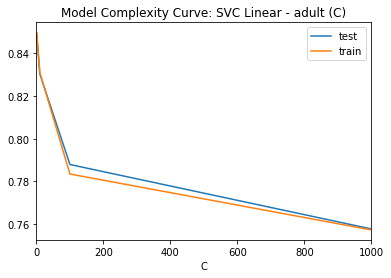

In [66]:
linear_adult_c.plot(title=linear_adult_c.name)

In [67]:
linear_spam_c = make_complexity_curve(linear_spam_clf, X_spam_train, y_spam_train, "C", [10**-3,10**-2,10**-1,10**0,10**1,10**2, 10**3],"SVC Linear", "spam")

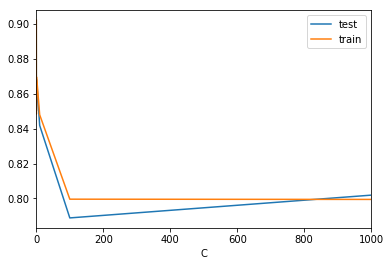

In [74]:
linear_spam_c.plot()

In [10]:
rbf_adult_c = make_complexity_curve(rbf_adult_clf, X_trans_adult_train, y_adult_train, "C", [10**-2,10**-1,10**0,10**1],"SVC rbf", "adult")

,test,train
C,,
0.01,0.786978,0.788118
0.10,0.832899,0.835986
1.00,0.845207,0.864634
10.00,0.839820,0.887791
100.00,0.829790,0.902835
1000.00,0.818642,0.916273


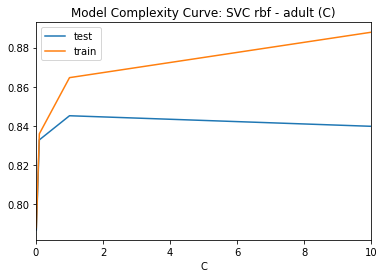

In [45]:
rbf_adult_c.head(4).plot(title=rbf_adult_c.name)
rbf_adult_c

In [30]:
rbf_spam_c = make_complexity_curve(rbf_spam_clf, X_trans_spam_train, y_spam_train, "C", [10**-3,10**-2,10**-1,10**0,10**1,10**2, 10**3],"SVC rbf", "spam")

,test,train
C,,
0.001,0.611413,0.611413
0.010,0.664402,0.668886
0.100,0.905435,0.910937
1.000,0.931250,0.947486
10.000,0.935598,0.970448
100.000,0.932337,0.987908
1000.000,0.921196,0.994973


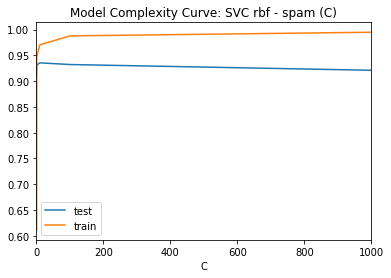

In [51]:
rbf_spam_c.plot(title=rbf_spam_c.name)
rbf_spam_c

In [46]:
rbf_adult_gamma = make_complexity_curve(rbf_adult_clf, X_trans_adult_train, y_adult_train, "gamma", [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2],"SVC rbf", "adult")

,test,train
gamma,,
0.0001,0.751378,0.751596
0.0010,0.823987,0.824951
0.0100,0.833561,0.836970
0.1000,0.795723,0.803079
1.0000,0.769572,0.773664
10.0000,0.753119,0.754486
100.0000,0.751046,0.751046


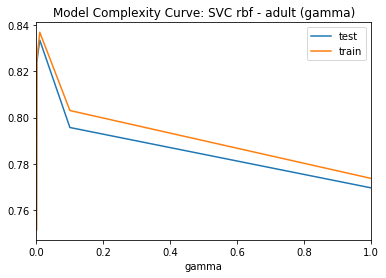

In [50]:
rbf_adult_gamma.head(5).plot(title=rbf_adult_gamma.name)
rbf_adult_gamma

In [35]:
rbf_spam_gamma = make_complexity_curve(rbf_spam_clf, X_trans_spam_train, y_spam_train, "gamma", [10**-2,10**-1,10**0,10**1,10**2],"SVC rbf", "spam")

,test,train
gamma,,
0.01,0.930978,0.942255
0.10,0.910870,0.973166
1.00,0.783967,0.994769
10.00,0.740761,0.997894
100.00,0.713859,0.998573


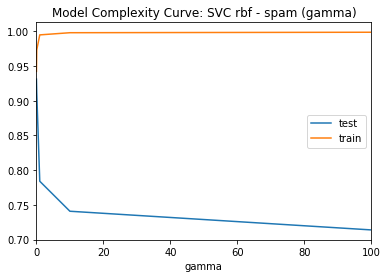

In [48]:
rbf_spam_gamma.plot(title=rbf_spam_gamma.name)
rbf_spam_gamma

In [52]:
adult_clf = SVC(kernel='rbf', C=1,gamma=0.0100)
spam_clf = SVC(kernel='rbf', C=10, gamma=0.01)

**Timing Curve**

In [53]:
adult_tc = make_timing_curve(adult_clf, X_trans_adult_train, y_adult_train, 'svc', 'adult')

,test,train
train_size,,
2412,1.799137,0.247431
4825,2.985380,0.963277
7238,3.646896,2.095649
9651,4.109026,3.935339
12064,4.202471,6.099086
14477,4.014372,9.020494
16890,3.501230,12.562717
19303,2.637978,16.440125
21716,1.472985,20.969544


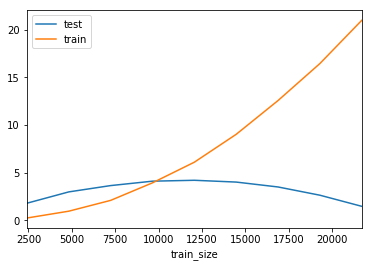

In [61]:
adult_tc.plot()
adult_tc

In [55]:
spam_tc = make_timing_curve(spam_clf, X_trans_spam_train, y_spam_train, 'svc', 'spam')

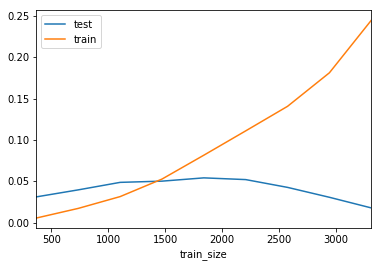

In [56]:
spam_tc.plot()

**Learning Curve**

In [57]:
adult_lc = make_learning_curve(adult_clf, X_trans_adult_train, y_adult_train, np.linspace(0.1, 1.0, 10),'svc', 'adult')

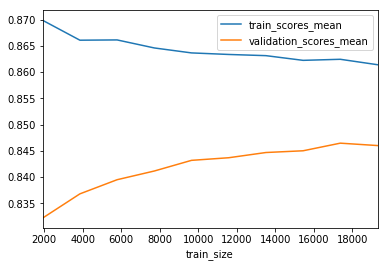

In [58]:
adult_lc.plot()

In [59]:
spam_lc = make_learning_curve(spam_clf, X_trans_spam_train, y_spam_train, np.linspace(0.1, 1.0, 10),'svc', 'spam')

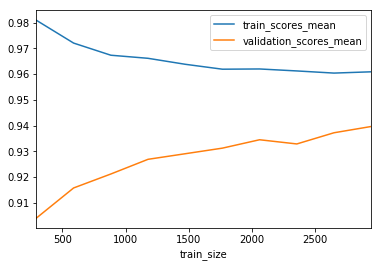

In [60]:
spam_lc.plot()